<a href="https://colab.research.google.com/github/Marcel-Milosz/Dane/blob/Code-Review/Milosz_Marcel_Yahoo_niestacj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install altair_viewer

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-19,23.250000,23.250000,22.830000,23.110001,21.731686,67700
1,2016-05-20,23.170000,23.570000,23.080000,23.350000,21.957369,47200
2,2016-05-23,23.290001,23.340000,22.959999,23.000000,21.628242,65900
3,2016-05-24,23.129999,23.379999,22.680000,23.250000,21.863335,306800
4,2016-05-25,23.230000,23.389999,22.959999,22.990000,21.618841,59500
...,...,...,...,...,...,...,...
1253,2021-05-12,37.139999,37.369999,36.549999,36.580002,36.580002,58400
1254,2021-05-13,36.500000,37.209999,36.500000,37.119999,37.119999,31000
1255,2021-05-14,37.770000,38.130001,37.290001,38.049999,38.049999,85700
1256,2021-05-17,37.919998,38.410000,37.630001,37.930000,37.930000,48700


,x,y
0,0,21.731686
1,1,21.844527
2,2,21.792806
3,3,21.745789
4,4,21.741088
...,...,...
1253,1253,36.865002
1254,1254,36.850001
1255,1255,37.584999
1256,1256,37.990000


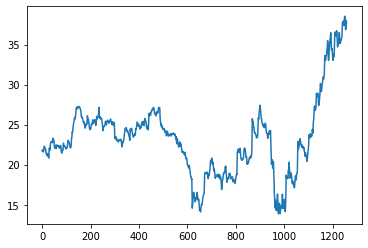

In [2]:
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import altair_viewer

# Gather data from YahooFinance 
yahoDb = pd.read_csv("/content/drive/MyDrive/YahoDB.csv")

# Display imported DB 
display(yahoDb)

# Get the rolling mean from Adj close column
RollingMean = yahoDb["Adj Close"].rolling(2, min_periods = 1).mean()
# print(RollingMean)

def PandasChart():
  '''
  Display rolling mean using pandas and plt lib
  '''

  df = RollingMean

  plt.figure()
  df.plot()

def AltairChart():
  '''
  Display rolling mean using Altair lib
  '''

  alt.renderers.enable('default')

  # Create Dataframe for Altair
  AdjClose = RollingMean
  newDf = pd.DataFrame({'x': list(range(0, len(AdjClose))),
                        'y': AdjClose})
  
  display(newDf)

  chart = alt.Chart(newDf).mark_point().encode(
    x = 'x',
    y = 'y'
  ).interactive()

  alt.renderers.enable('altair_viewer', inline=True)
  altair_viewer.display(chart, inline=True)
  altair_viewer.display(chart)

PandasChart()
AltairChart()
